In [1]:
import numpy as np
import pandas as pd
import numpy as np
import altair as alt
import pandas as pd

In [48]:
data = pd.read_csv("opensooq_apts.csv", index_col= False)
data.head()


,Unnamed: 0,bedrooms,bathrooms,area,neighbourhood,price
0,0,5 Bedrooms,3 Bathrooms,155,NaN,NaN
1,1,3 Bedrooms,3 Bathrooms,170,NaN,NaN
2,2,5 Bedrooms,3 Bathrooms,280,Al-Taif,"28,500"
3,3,3 Bedrooms,4 Bathrooms,110,Khartoum,apartment for sale Third Floor
4,4,2 Bedrooms,2 Bathrooms,234,Al-Kalakla,"5,700,000"


In [49]:
data.shape

(396, 6)

In [50]:
data.dtypes

Unnamed: 0        int64
bedrooms         object
bathrooms        object
area             object
neighbourhood    object
price            object
dtype: object

In [51]:
data['area'] = pd.to_numeric(data['area'], errors='ignore')
data['price'] = pd.to_numeric(data['price'], errors='ignore')
data.bedrooms = data.bedrooms.str[0:1]
data.bathrooms = data.bathrooms.str[0:1]
data.head()

,Unnamed: 0,bedrooms,bathrooms,area,neighbourhood,price
0,0,5,3,155,NaN,NaN
1,1,3,3,170,NaN,NaN
2,2,5,3,280,Al-Taif,"28,500"
3,3,3,4,110,Khartoum,apartment for sale Third Floor
4,4,2,2,234,Al-Kalakla,"5,700,000"


In [52]:
data['neighbourhood'].value_counts(normalize=False)

Khartoum         107
Al-Amarat         52
Arkaweet          16
Omdurman          15
Bahri             14
Kafouri           14
Al-Manshiya       11
Al-Taif           10
Al-Riyadh          8
Wad Madani         6
Al-Ma'mora         6
Sharq Al-Nile      5
Al-Kalakla         4
Nuzha              4
Al-Jazirah         3
Al-Barari          3
Al-Emtidad         2
Al-Huda            2
Al-Remila          2
Kosti              1
Hay Al-Matar       1
Al-Jerif East      1
New Halfa          1
Name: neighbourhood, dtype: int64

In [53]:
data['price'] = data['price'].str.replace(',', '')
data['price'] = data.price.str.extract('(\d+)')
data['price'] = data['price'].astype(float)
data['area'] = data.area.str.extract('(\d+)')
data['area'] = data['area'].astype(float)
data= data.fillna(0)

data.head()

,Unnamed: 0,bedrooms,bathrooms,area,neighbourhood,price
0,0,5,3,155.0,0,0.0
1,1,3,3,170.0,0,0.0
2,2,5,3,280.0,Al-Taif,28500.0
3,3,3,4,110.0,Khartoum,0.0
4,4,2,2,234.0,Al-Kalakla,5700000.0


In [54]:
data['price'].value_counts()

0.0           183
55350.0        19
1000.0         18
5.0             9
3.0             7
             ... 
5811.0          1
5535021.0       1
11111111.0      1
6500.0          1
7472278.0       1
Name: price, Length: 105, dtype: int64

In [55]:
data.loc[:,'price'] = np.where(data['price'] < 100, data['price']*1000000, data['price'])
data.shape

(396, 6)

In [56]:
data['price'].value_counts()

0.0           183
55350.0        19
1000.0         18
5000000.0      10
3000000.0      10
             ... 
6500.0          1
40000000.0      1
11111111.0      1
5535021.0       1
3000.0          1
Name: price, Length: 96, dtype: int64

In [57]:
data.shape

(396, 6)

In [60]:
data = data[data.price > 0]
data = data[data.price > 2000000]
data.shape


(85, 6)

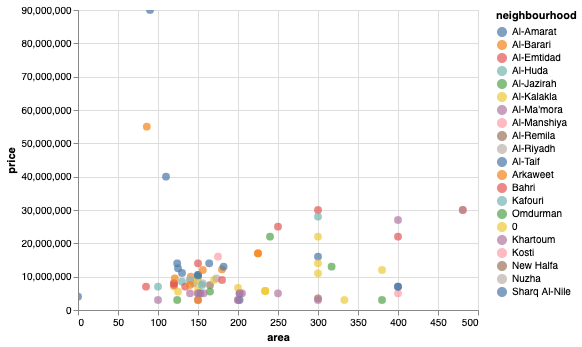

In [61]:
data.loc[:,'price'] = np.where(data['price'] < 100, data['price']*1000000, data['price'])
alt.Chart(data).mark_circle(size=60).encode(
    x='area:Q',
    y='price:Q',
    color='neighbourhood:N',
    tooltip=['area', 'price', 'neighbourhood', 'bedrooms','bathrooms']
).interactive()

In [62]:
# data is too small to build a model. EDA show no conclusive insights